#### BLM442 Keşif aktivitesi-4: pandas & gorsellestirme

#### İsim/Soyisim:Murat Altınay 
#### Öğrenci Numarası:170202109
#### E-mail:170202109@kocaeli.edu.tr
#### Kullanılan dataset adı:NBA Salary and Statistics 2016-17
#### Dataset url:https://www.kaggle.com/rikdifos/nba-salary-and-statistics-201617

#### İntihal: 
Netten alınacak kısmi kod parçaları önceden kod içinde/raporda belirtilmek ve soru sorulduğunda cevaplanması durumunda sıkıntı çıkarmayacaktır. (i) Internet kaynağını belirtmeyen/açıklayamayan/üzerinde geliştirme yapmayan veya (ii) birbirleriyle benzer/aynı çalışma teslim edenlerin aktiviteleri sıfır üzerinden değerlendirilecektir.

#### KA-4 Gönderim şekli

1-pdf olarak "ogrenciNo.pdf" dokumanını gonderme
-calisma dosyasında (File -> Print Preview) sonrası olusan html dosyasını yazdır deyip pdf olarak kaydetme veya
-(File -> Download as -> HTML) seklinde indirip pdf'e cevirme http://html2pdf.com/

2-(File -> Download as -> Notebook) indirip "ogrenciNo.ipynb" dokumanını gonderme

suleyman.eken@kocaeli.edu.tr

### Problemleriniz pandas fonksiyonlarını içerecek şekilde analiz edildikten sonra her probleme ait bir grafik sunulacaktır. Basit olarak su kadar satırı sec, bar grafik olarak goster tarzı problemler olmasın. Daha degerli bilgileri icerecek sekilde problem seciniz. Gorsellestirme icin matplotlib, seaborn, bokeh kutuphaneleri en az birer defa kullanılmalıdır..

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("NBA_season1718_salary.csv")
dff = pd.read_csv("Seasons_Stats.csv")
##df.head(10)
##df.tail(10)


#### Problem 1: NBA oyuncuncuları kaç milyon dolar maaş alıyor büyükten küçüğe sıralanışının grafiği nasıldır?İlk yirmiyi sıralayınız.

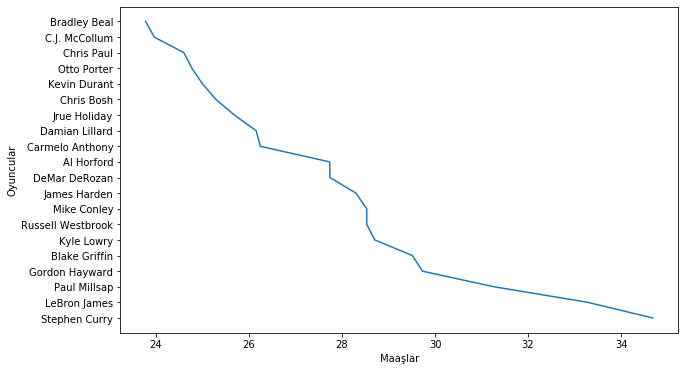

In [12]:
df_sub=df[['Tm','Player','season17_18']].sort_values( by ='season17_18', ascending = [False]).head(20)
plt.plot(df_sub['season17_18']/10**6,df_sub['Player'])
plt.ylabel('Oyuncular')
plt.xlabel('Maaşlar')
plt.rcParams['figure.figsize']='10,6'
plt.show()

#### Problem 2: Takımların oyuncularına verdiği ortalama maaşların  grafiği nasıldır?

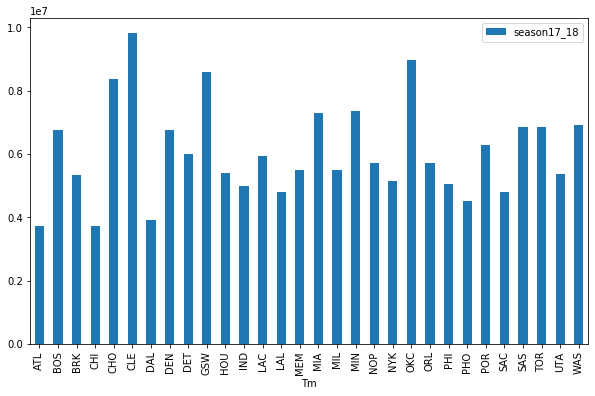

In [3]:
df_sub=df[['Tm','season17_18']].groupby(['Tm']).mean()
plt.rcParams['figure.figsize']='10,6'
df_sub.plot.bar()


#### Problem 3: Cleveland Cavaliers(CLE) takımı oyuncularının aldığı maaş grafiği?

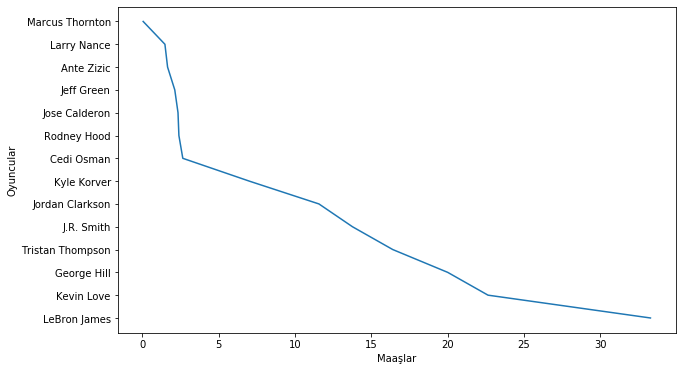

In [4]:
df_cle=df[df['Tm'] == 'CLE'].sort_values( by ='season17_18', ascending = [False])
df_cle=df_cle[['Tm','Player','season17_18']]
plt.plot(df_cle['season17_18']/10**6,df_cle['Player'])
plt.ylabel('Oyuncular')
plt.xlabel('Maaşlar')
plt.rcParams['figure.figsize']='10,6'
plt.show()

#### Problem 4: Takımların kaçar adet oyuncusu vardır grafikle gösteriniz? 

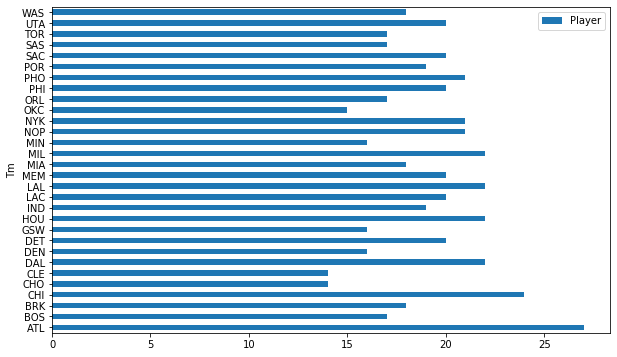

In [5]:
df_sub=df.loc[:,['Tm','Player']]
df_pcount=df_sub.groupby(['Tm']).agg('count')
plt.rcParams['figure.figsize']='10,6'
df_pcount.plot.barh()

#### Problem 5: 25milyon dolardan fazla alan maaş NBA oyuncularını grafikleştiriniz

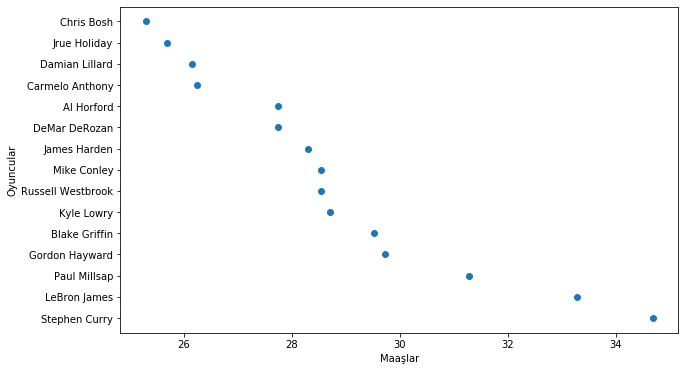

In [6]:
df_sub = df[df['season17_18'] > 25000000]
df_sub = df_sub[['Player','season17_18']]
plt.plot(df_sub['season17_18']/10**6,df_sub['Player'],'o')
plt.ylabel('Oyuncular')
plt.xlabel('Maaşlar')
plt.rcParams['figure.figsize']='10,6'
plt.show()

#### Problem 6: Oyuncu sayısı 20 adetten fazla olan takımlar hangileridir?

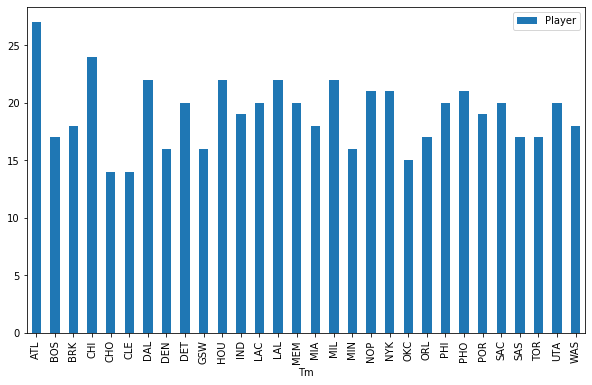

In [7]:
df_sub=df[['Tm','Player']].groupby(['Tm']).agg('count')
plt.rcParams['figure.figsize']='10,6'
df_sub.plot.bar()

#### Problem 7: 1971-2017 yılları arasında CLE takımının attığı toplam sayı grafiği?
Her yıl CLE takımında oynayan oyuncuların attığı yıl içi toplam sayılar.

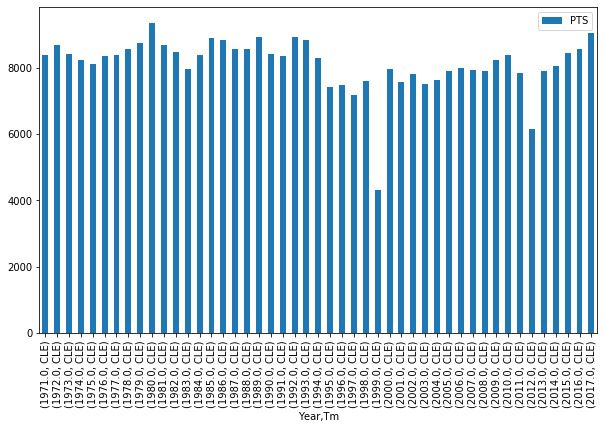

In [18]:
dff_sub=dff.loc[:,['Tm','Year','PTS']]
dff_sub=dff_sub[dff_sub['Tm']=='CLE'].groupby(['Year','Tm'])
dff_sub=dff_sub.agg('sum')
plt.rcParams['figure.figsize']='10,6'
dff_sub.plot.bar()

#### Problem 8: Oyuncuların yıllar içinde bir sezonda denedikleri maximum sayı denemeleri top 10 sıralaması nasıldır?
Her oyuncu için sezonlar arası denedikleri sayı denemeleri kıyaslanır en büyük seçilir.Sonra oyuncular arası maximum deneme sayılarına göre sıralama yapılır.bu sıralama sonucunun ilk 10u grafikleştirilir.

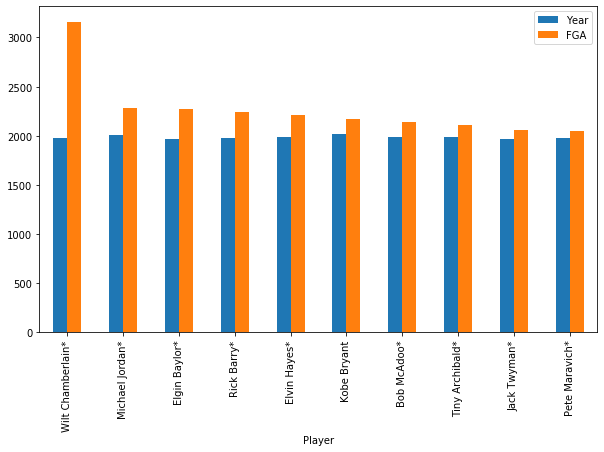

In [38]:
dff_sub=dff.loc[:,['Year','Player','FGA']]
dff_sub=dff_sub.groupby(['Player']).agg('max')
dff_sub=dff_sub.sort_values(by = ['FGA'], ascending = [False] ).head(10)
plt.rcParams['figure.figsize']='10,6'
dff_sub.plot.bar()

#### Problem 9:Stephen Curry sezonlar arası sayı denemesi grafiği?

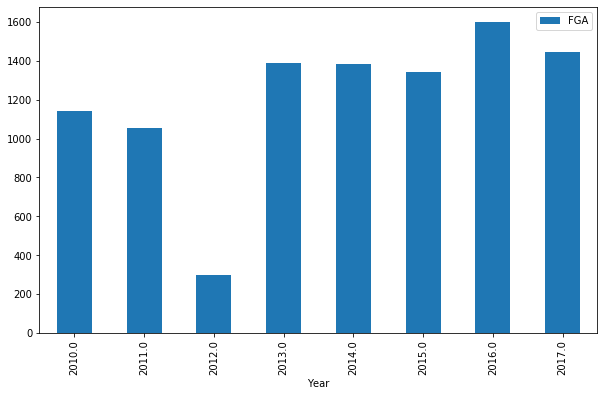

In [29]:
dff_sub=dff.loc[:,['Year','Player','FGA']]
dff_sub=dff_sub[dff_sub['Player'] == 'Stephen Curry']
dff_sub=dff_sub.sort_values(by = ['Year'])
dff_sub[['Year','Player','FGA']]
plt.rcParams['figure.figsize']='10,6'
dff_sub.plot.bar(x='Year',y='FGA')

#### Problem 10: Sezonlar arası Lebron James isimli NBA oyuncusunun 2 puanlık atışlarında istabet yüzdesi grafiği?

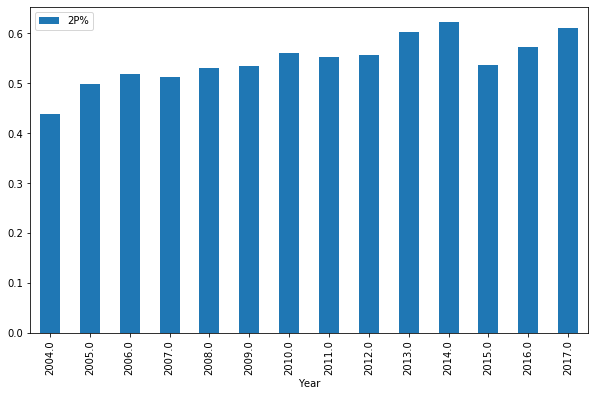

In [27]:
dff_sub=dff.loc[:,['2P%','Player','Year']]
dff_sub=dff_sub[dff_sub['Player'] == 'LeBron James']
dff_sub=dff_sub.sort_values(by = ['Year'])
plt.rcParams['figure.figsize']='10,6'
dff_sub.plot.bar(x='Year',y='2P%')